In [2]:
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np

# Charger les features et labels
features = torch.load("output/abstract_features.pt")
labels = torch.load("output/abstract_labels.pt")

features_np = features.numpy()
labels_np = labels.numpy()

print(f"Shape des features : {features_np.shape}")
print(f"Shape des labels : {labels_np.shape}")




Shape des features : (1241, 4096)
Shape des labels : (1241,)


/tmp/ipykernel_241193/426494413.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  features = torch.load("output/abstract_features.pt")
/tmp/ipykernel_241193/426494413.py:9

In [4]:
def plot_embeddings(embeddings, labels, title="Projection 2D"):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='tab10', s=10, alpha=0.7)
    plt.colorbar(scatter, ticks=np.unique(labels))
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()

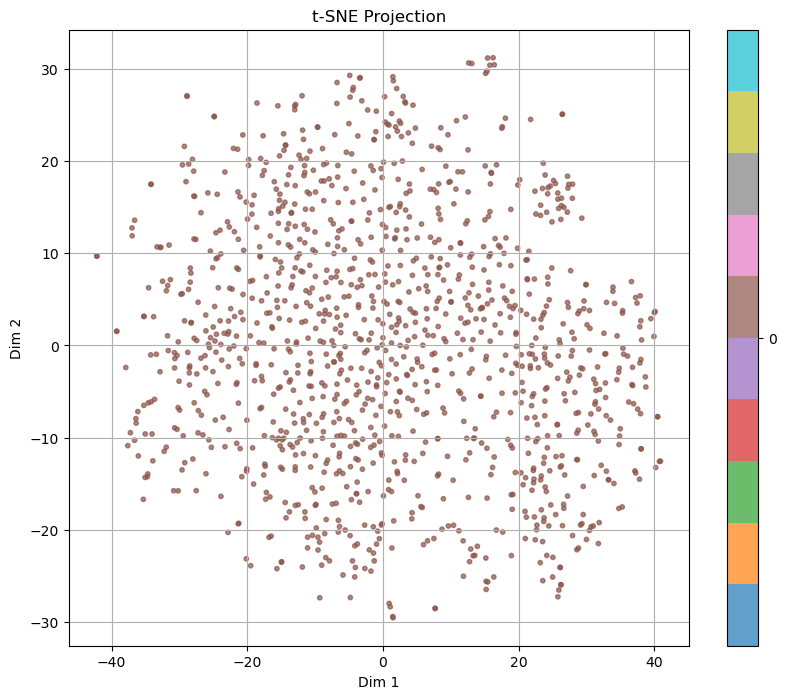

In [8]:
from sklearn.manifold import TSNE

# dimension reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_2d_tsne = tsne.fit_transform(features_np)

plot_embeddings(features_2d_tsne, labels_np, title="t-SNE Projection")


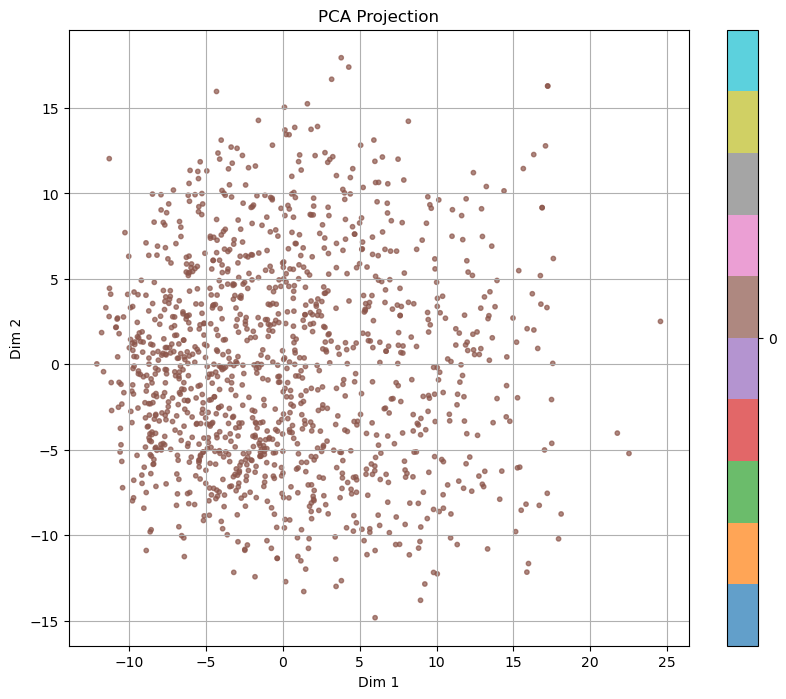

In [10]:
from sklearn.decomposition import PCA

# dimension reduction
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_np)
plot_embeddings(features_2d, labels_np, title="PCA Projection")

In [11]:
pca.explained_variance_

array([46.604946, 36.67861 ], dtype=float32)

In [13]:
# Shape: (2, 4096) => 2 principal components, each with 4096 weights
print(pca.components_.shape)

# Top contributing features for PC1
import numpy as np

top_features_pc1 = np.argsort(np.abs(pca.components_[0]))[::-1][:10]
top_features_pc2 = np.argsort(np.abs(pca.components_[1]))[::-1][:10]

print("Top 10 contributing features for PC1:", top_features_pc1)
print("Top 10 contributing features for PC2:", top_features_pc2)


(2, 4096)
Top 10 contributing features for PC1: [ 515 3093 1384 3168 2809 3560   61 1434 3211 1077]
Top 10 contributing features for PC2: [4076 1803 1013  165 1681 2035 1123 2337 3813 3325]
